In [2]:
pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

# EJERCICIO 1

In [4]:
tips = pd.read_csv('tips.csv')

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Principales atributos del dataset "tips"

In [6]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [9]:
tips.sex.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
tips.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
tips.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [12]:
tips.shape

(244, 7)

In [13]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [14]:
len(tips)

244

In [15]:
tips.ndim

2

In [16]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000


### Columna porcentaje de propina

In [17]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])*100

### Conversión de variable "day" a categórica para posterior ordenamiento a la hora de realizar gráficos

In [18]:
tips['day'] = pd.Categorical(tips['day'], categories=
    ['Thur','Fri','Sat','Sun'],
    ordered=True)

# Visualización

# Una variable numérica

Gráfico "boxplot" para propinas menores a 10% sobre el total de cuenta.

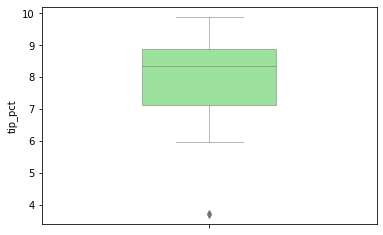

In [19]:
sns.boxplot(y='tip_pct', data=tips[tips['tip_pct']<10], orient='v', width=0.4, linewidth=0.5, color='lightgreen')

Las propinas de menos del 10% tienen un mínimo aproximado del 6% y su mediana se ubica por encima del 8%. Existe un outlier por debajo del 4%

In [20]:
tips[tips['tip_pct']<10].describe()

,total_bill,tip,size,tip_pct
count,21.000000,21.000000,21.000000,21.000000
mean,27.932381,2.013333,2.761905,7.912704
std,9.488106,0.714208,0.943650,1.476520
min,12.600000,1.000000,2.000000,3.695515
25%,22.670000,1.500000,2.000000,7.127584
50%,27.180000,2.000000,2.000000,8.363202
75%,32.830000,2.500000,3.000000,8.869180
max,45.350000,3.500000,5.000000,9.891808


# Dos variables numéricas

Relación lineal inversa entre total de cuenta y propina. Mientras mayor es la cuenta, menor es la propina.

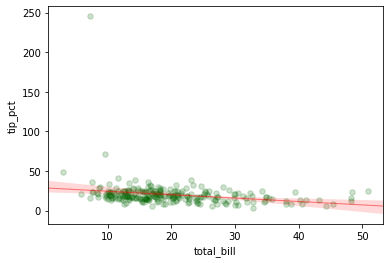

In [21]:
sns.regplot('total_bill', 'tip_pct', data=tips, line_kws={'color':'r', 'alpha':0.5, 'lw':1}, scatter_kws={'color':'darkgreen', 'alpha':0.2, 's':30})


# Dos variables, numérica y categórica

Porcentaje de propinas respecto a "tiempo" de comida

[(0, 80)]

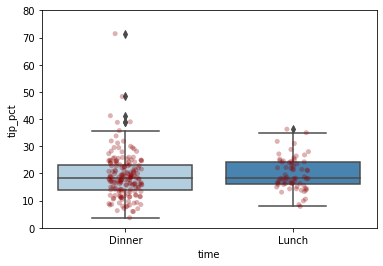

In [22]:
fig2 = sns.boxplot(data=tips, x='time', y='tip_pct', palette='Blues')
fig2 = sns.stripplot(data=tips, x='time', y='tip_pct', alpha=0.3, color='darkred')

# Excluyendo outliers de eje

fig2.set(ylim=(0, 80))


# Tres variables, una numérica y dos categóricas

## Total cuenta vs día & smoker

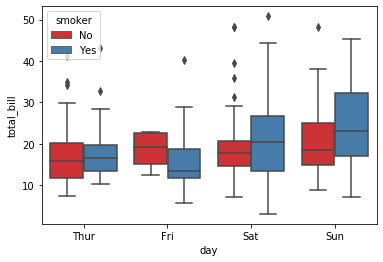

In [23]:
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='Set1')

In [24]:
tips.groupby(['day', 'smoker'])['total_bill'].describe()

count       mean        std    min     25%     50%      75%  \
day  smoker                                                                
Thur No       45.0  17.113111   7.721728   7.51  11.690  15.950  20.2700   
     Yes      17.0  19.190588   8.355149  10.34  13.510  16.470  19.8100   
Fri  No        4.0  18.420000   5.059282  12.46  15.100  19.235  22.5550   
     Yes      15.0  16.813333   9.086388   5.75  11.690  13.420  18.6650   
Sat  No       45.0  19.661778   8.939181   7.25  14.730  17.820  20.6500   
     Yes      42.0  21.276667  10.069138   3.07  13.405  20.390  26.7925   
Sun  No       57.0  20.506667   8.130189   8.77  14.780  18.430  25.0000   
     Yes      19.0  24.120000  10.442511   7.25  17.165  23.100  32.3750   

               max  
day  smoker         
Thur No      41.19  
     Yes     43.11  
Fri  No      22.75  
     Yes     40.17  
Sat  No      48.33  
     Yes     50.81  
Sun  No      48.17  
     Yes     45.35

- Mientras más avanzada la semana, mayor es la cuenta promedio, así como también los respectivos cuartiles.
- Los sábados, con los clientes fumadores, se observan mayor cantidad de puntos "anómalos": cuentas mucho más alta que la media.
- Los jueves son los días con menor nivel de cuenta promedio

## Porcentaje propinas vs día & smoker

[(0, 80)]

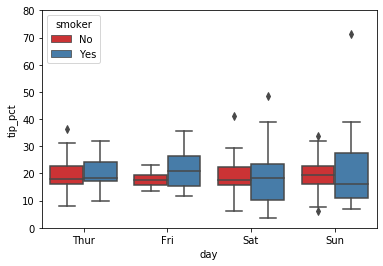

In [25]:
tip_day_smoker = sns.boxplot(y='tip_pct', x='day', data=tips, hue='smoker', palette='Set1')
tip_day_smoker.set(ylim=(0, 80))

# Outlier fuera de escala

In [26]:
tips.groupby(['day', 'smoker'])['tip_pct'].describe()

count       mean        std        min        25%        50%  \
day  smoker                                                                 
Thur No       45.0  19.342383   5.606472   7.870370  15.974441  18.132366   
     Yes      17.0  19.850769   5.717022   9.891808  17.376195  18.181818   
Fri  No        4.0  17.974008   3.945780  13.686131  15.921533  17.548710   
     Yes      15.0  21.629303   7.753026  11.551791  15.451213  21.052632   
Sat  No       45.0  19.041211   5.862572   6.021678  15.772871  17.668097   
     Yes      42.0  17.983267   8.949588   3.695515  10.112717  18.151271   
Sun  No       57.0  19.361683   6.030162   6.320401  16.249386  19.284065   
     Yes      19.0  32.202089  53.806061   7.027407  10.831279  16.025641   

                   75%         max  
day  smoker                         
Thur No      22.675737   36.297641  
     Yes     24.198427   31.796502  
Fri  No      19.601185   23.112481  
     Yes     26.485233   35.773710  
Sat  No      22.536182   41.240876  
     Yes     23.533653   48.309179  
Sun  No      22.727273   33.810143  
     Yes     27.546017  245.238095

- Propina promedio es más grande los domingos y para los fumadores
- Los domingos, además, son los días con propinas con más desvío (para arriba) sobre la media --> outliers

# Tres variables categóricas y una variable numérica

### Promedio de propina según día, sexo y smoker

C:\Users\tomi_\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


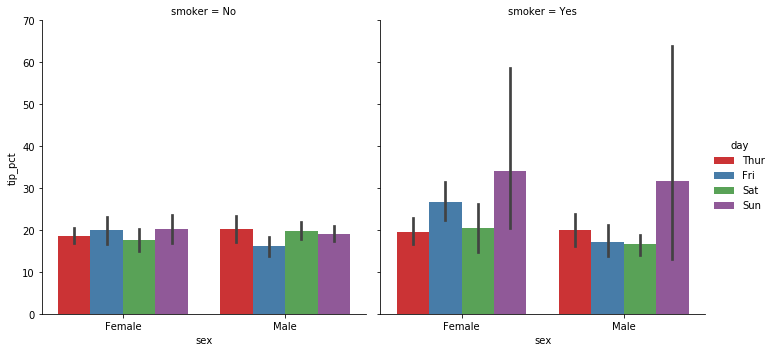

In [27]:
graf2 = sns.factorplot(y='tip_pct', x='sex', hue='day', kind='bar', col='smoker', data=tips, palette='Set1')
graf2.set(ylim=(0, 70))

In [28]:
round(tips.groupby(['day', 'sex', 'smoker'])['tip_pct'].describe(), 2)

count   mean    std    min    25%    50%    75%     max
day  sex    smoker                                                         
Thur Female No       25.0  18.63   4.31   7.87  16.23  17.22  21.90   26.42
            Yes       7.0  19.63   4.56  13.12  18.08  18.18  21.56   26.82
     Male   No       20.0  20.23   6.91   8.53  15.02  19.80  24.36   36.30
            Yes      10.0  20.00   6.65   9.89  15.60  18.16  24.14   31.80
Fri  Female No        2.0  19.89   4.56  16.67  18.28  19.89  21.50   23.11
            Yes       7.0  26.74   6.69  18.16  22.64  24.72  31.63   35.77
     Male   No        2.0  16.06   3.35  13.69  14.87  16.06  17.24   18.43
            Yes       8.0  17.16   5.73  11.55  13.35  15.45  18.41   28.83
Sat  Female No       13.0  17.57   4.98   6.02  15.68  17.56  21.32   24.88
            Yes      15.0  20.57  11.65   5.98  12.33  18.37  23.93   48.31
     Male   No       32.0  19.64   6.16  10.89  15.80  18.25  23.11   41.24
            Yes      27.0  16.55   6.87   3.70   9.40  16.93  23.25   25.88
Sun  Female No       14.0  20.20   6.57   6.32  17.30  18.85  25.06   33.81
            Yes       4.0  34.03  24.99  20.11  20.54  22.28  35.78   71.43
     Male   No       43.0  19.09   5.90   7.74  15.39  19.44  22.39   31.87
            Yes      15.0  31.72  59.89   7.03  10.51  11.88  26.07  245.24

# Dos variables numéricas y 2 variables categóricas

Cuenta total, porcentaje de propina y dia de semana (Total_bill, bill_pct, day)

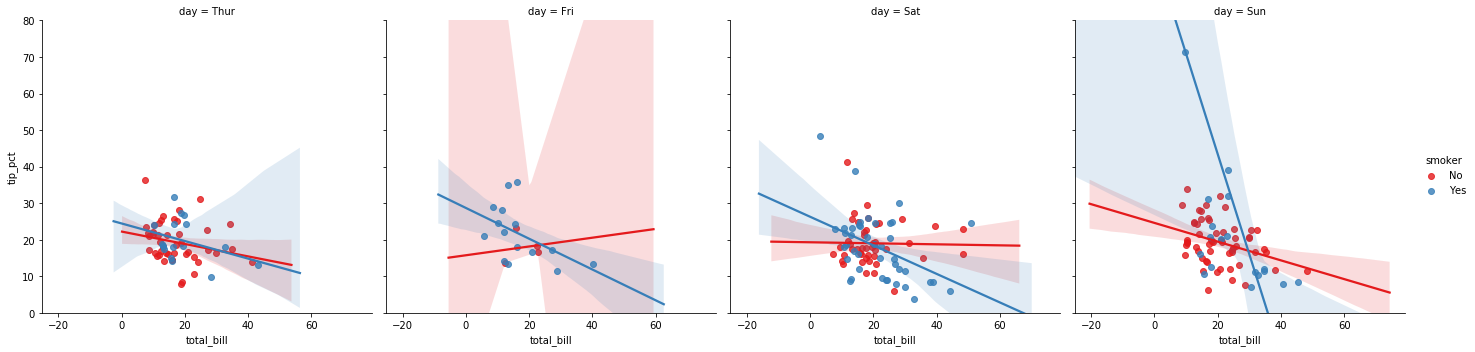

In [29]:
graf3 = sns.lmplot(data=tips, x='total_bill', y='tip_pct', col='day', hue='smoker', fit_reg=True, palette='Set1')
graf3.set(ylim=(0, 80))

# EJERCICIO 2

In [30]:
# Definición de nombre de variables

mcabecera = ['movie_id', 'titulo', 'genero']


# Carga de Dataset

movies = pd.read_table('movies.dat', sep = '::', header = None, names = mcabecera)
movies.head()

C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movie_id,titulo,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## Atributos principales del dataset Movies

In [31]:
movies.dtypes

movie_id     int64
titulo      object
genero      object
dtype: object

In [32]:
len(movies)

3883

In [33]:
movies.shape

(3883, 3)

In [34]:
movies.ndim

2

In [35]:
movies.isnull().sum()

movie_id    0
titulo      0
genero      0
dtype: int64

In [36]:
movies.describe(include='all')

,movie_id,titulo,genero
count,3883.000000,3883,3883
unique,NaN,3883,301
top,NaN,Jerry & Tom (1998),Drama
freq,NaN,1,843
mean,1986.049446,NaN,NaN
std,1146.778349,NaN,NaN
min,1.000000,NaN,NaN
25%,982.500000,NaN,NaN
50%,2010.000000,NaN,NaN
75%,2980.500000,NaN,NaN


## Desagregación de columna "género" de acuerdo a múltiples géneros + creación matriz géneros

In [37]:
todos_generos_repetidos = []

In [38]:
for x in movies.genero:
    todos_generos_repetidos.extend(x.split('|'))

In [39]:
todos_generos_repetidos

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 "Children's",
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Animation',
 "Children's",
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Romance',
 'Thriller',
 'Comedy',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Thriller',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Drama',
 'Drama',
 'Sci-Fi',
 'Adventure',
 'Romance',
 "Children's",
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Romance',
 'Drama',
 'Drama',
 'War',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Crime',
 'Thrill

In [40]:
len(todos_generos_repetidos)

6408

In [41]:
generos = pd.unique(todos_generos_repetidos)

In [42]:
len(generos)

18

In [43]:
generos

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [44]:
cero_matriz = np.zeros((len(movies), len(generos)))

In [45]:
cero_matriz

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
cero_matriz.shape

(3883, 18)

In [47]:
dummies = pd.DataFrame(cero_matriz, columns=generos)
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
gen = movies.genero
gen[0]

"Animation|Children's|Comedy"

In [49]:
gen[0].split('|')

['Animation', "Children's", 'Comedy']

In [50]:
for i, gen in enumerate(movies.genero):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1
    

In [51]:
dummies.describe()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000
mean,0.027041,0.064641,0.309039,0.072882,0.017512,0.121298,0.412825,0.129539,0.054339,0.126706,0.088334,0.071079,0.032707,0.036827,0.029359,0.027298,0.011331,0.017512
std,0.162224,0.245923,0.462157,0.259976,0.131187,0.326515,0.492405,0.335839,0.226715,0.332686,0.283816,0.256990,0.177891,0.188362,0.168832,0.162973,0.105858,0.131187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# Tabla movies expandida con tabla Dummies:

movies_dummies = movies.join(dummies) 


# CReación de columna con suma de películas

movies_dummies['cantidad_generos'] = movies_dummies.iloc[:, 4:].sum(axis=1)

movies_dummies.tail(10)

,movie_id,titulo,genero,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,cantidad_generos
3873,3943,Bamboozled (2000),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3874,3944,Bootmen (2000),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3876,3946,Get Carter (2000),Action|Drama|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3877,3947,Get Carter (1971),Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3878,3948,Meet the Parents (2000),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3879,3949,Requiem for a Dream (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3880,3950,Tigerland (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3881,3951,Two Family House (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3882,3952,"Contender, The (2000)",Drama|Thriller,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


### Incorporación de columna "año"

In [53]:
movies_dummies['año'] = movies_dummies['titulo'].str[-5:-1]
movies_dummies['año'] = pd.to_datetime(movies_dummies['año'], format='%Y')
movies_dummies

,movie_id,titulo,genero,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,cantidad_generos,año
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1995-01-01
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1995-01-01
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1995-01-01
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1995-01-01
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1995-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2000-01-01
3879,3949,Requiem for a Dream (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2000-01-01
3880,3950,Tigerland (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2000-01-01
3881,3951,Two Family House (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2000-01-01


### Tabla Dummies + año

In [54]:
movies_dummies_año_col = movies_dummies['año']
movies_dummies_año = dummies
movies_dummies_año['año'] = movies_dummies_año_col
movies_dummies_año

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,año
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000-01-01
3879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000-01-01
3880,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000-01-01
3881,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000-01-01


## Visualización

### Variable numérica + variable categórica

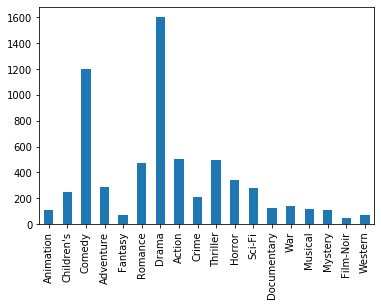

In [55]:
suma = dummies.sum()
suma.plot(kind='bar')

### Cantidad de géneros por película

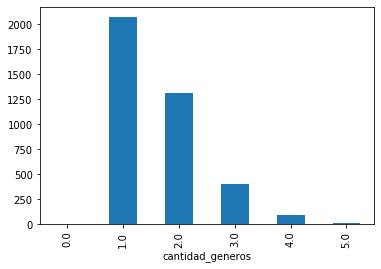

In [56]:
movies_dummies.groupby('cantidad_generos')['cantidad_generos'].count().plot(kind='bar')

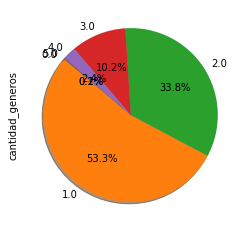

In [57]:
movies_dummies.groupby('cantidad_generos')['cantidad_generos'].count().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=140)

### Cantidad de peliculas por año

In [58]:
movies_año1 = movies_dummies.groupby('año').sum()
movies_año2 = movies_dummies.groupby('año')[['titulo']].count()
movies_año = movies_año2.join(movies_año1)

In [59]:
#Reordenación de columnas:

cols = list(movies_año.columns)
movies_año_final = movies_año[cols[0:1] + [cols[-1]] + cols[1:-1]]

In [60]:
# Cambio de nombre de columna

movies_año_final.rename(columns = {'titulo': 'cantidad_peliculas'})

,cantidad_peliculas,cantidad_generos,movie_id,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
año,,,,,,,,,,,,,,,,,,,,,
1919-01-01,3,5.0,8776,0.0,0.0,1.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920-01-01,2,2.0,6540,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1921-01-01,1,1.0,3310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1922-01-01,2,2.0,4543,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1923-01-01,3,3.0,9011,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-01-01,345,534.0,372088,7.0,20.0,115.0,22.0,5.0,48.0,150.0,...,23.0,45.0,12.0,14.0,19.0,8.0,7.0,6.0,2.0,1.0
1997-01-01,315,534.0,564155,6.0,22.0,98.0,22.0,6.0,52.0,139.0,...,26.0,55.0,10.0,18.0,11.0,10.0,5.0,15.0,2.0,0.0
1998-01-01,337,564.0,777010,8.0,18.0,112.0,16.0,2.0,58.0,166.0,...,25.0,51.0,15.0,17.0,18.0,5.0,3.0,10.0,3.0,1.0


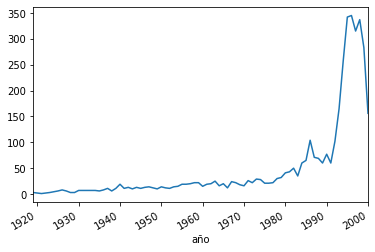

In [61]:
movies_año['cantidad_peliculas'] = movies_dummies.groupby('año')['movie_id'].count()
movies_año.cantidad_peliculas.plot()

### Géneros más compartidos por películas de ''Crime"

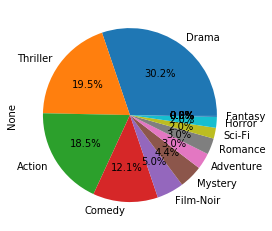

In [63]:
crime_movies = dummies[dummies['Crime'] == 1].sum().sort_values(ascending=False)
crime_movies.pop('Crime')
crime_movies.plot(kind='pie', autopct='%1.1f%%')

### Diagrama venn Drama, Comedia & Acción

In [64]:
drama_comedy_action_movies = dummies[['Drama', 'Comedy', 'Action']]

only_drama = drama_comedy_action_movies[(drama_comedy_action_movies['Comedy'] == 0) & (drama_comedy_action_movies['Action'] == 0)]['Drama'].sum()
only_comedy = drama_comedy_action_movies[(drama_comedy_action_movies['Drama'] == 0) & (drama_comedy_action_movies['Action'] == 0)]['Comedy'].sum()
only_action = drama_comedy_action_movies[(drama_comedy_action_movies['Drama'] == 0) & (drama_comedy_action_movies['Comedy'] == 0)]['Action'].sum()

drama_comedy = drama_comedy_action_movies[(drama_comedy_action_movies['Drama'] == 1) & (drama_comedy_action_movies['Comedy'] == 1) & (drama_comedy_action_movies['Action'] == 0)]['Drama'].sum()
drama_action = drama_comedy_action_movies[(drama_comedy_action_movies['Drama'] == 1) & (drama_comedy_action_movies['Comedy'] == 0) & (drama_comedy_action_movies['Action'] == 1)]['Drama'].sum()
comedy_action = drama_comedy_action_movies[(drama_comedy_action_movies['Drama'] == 0) & (drama_comedy_action_movies['Comedy'] == 1) & (drama_comedy_action_movies['Action'] == 1)]['Comedy'].sum()

drama_comedy_action = drama_comedy_action_movies[(drama_comedy_action_movies['Drama'] == 1) & (drama_comedy_action_movies['Comedy'] == 1) & (drama_comedy_action_movies['Action'] == 1)]['Drama'].sum()

#only_comedy = drama_comedy_movies[(drama_comedy_movies['Drama'] == 0)]['Comedy'].sum()
#drama_comedy = drama_comedy_movies[drama_comedy_movies['Drama'] == 1 & (drama_comedy_movies['Comedy'] == 1)]['Comedy'].sum()
only_drama

1287.0

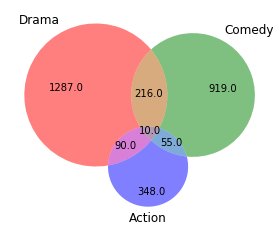

In [65]:
venn3(subsets = (only_drama, only_comedy, drama_comedy, only_action, drama_action, comedy_action, drama_comedy_action), set_labels = ('Drama', 'Comedy', 'Action'), alpha = 0.5);

### Cantidad de géneros por pélicula por año para las películas de drama

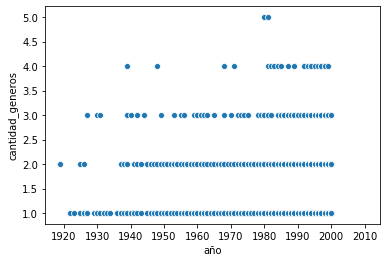

In [66]:
grafico_drama = sns.scatterplot(data=movies_dummies[movies_dummies['Drama'] == 1].sort_values(by='año'), x='año', y='cantidad_generos')

### Correlation map

In [90]:
correlacion_generos = movies_dummies_group_año.corr()
correlacion_generos


,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
Animation,1.000000,0.575968,-0.200076,-0.070722,0.038441,0.092642,0.114786,-0.177964,0.129891,-0.030776,-0.058954,0.030924,-0.153532,0.238302,0.232931,-0.015479,0.297636,0.119584
Children's,0.575968,1.000000,-0.214827,0.165568,0.244457,-0.058198,0.255856,-0.135122,0.110645,-0.044851,0.062715,0.106111,-0.125875,0.099214,0.164836,-0.044344,0.029984,0.045956
Comedy,-0.200076,-0.214827,1.000000,-0.128942,-0.036410,0.027499,-0.341977,-0.124256,-0.239037,-0.277112,-0.187225,-0.225068,0.021956,-0.141514,-0.312720,-0.104247,-0.281688,-0.184839
Adventure,-0.070722,0.165568,-0.128942,1.000000,0.192829,0.014370,0.064543,0.279600,-0.039662,-0.155257,0.122066,0.224443,-0.118053,-0.096502,-0.152005,-0.179480,-0.092450,0.030462
Fantasy,0.038441,0.244457,-0.036410,0.192829,1.000000,-0.000255,0.110103,0.144334,-0.053462,-0.048205,0.071088,0.409206,0.077836,0.047916,-0.070600,-0.041276,-0.142649,-0.099021
Romance,0.092642,-0.058198,0.027499,0.014370,-0.000255,1.000000,0.113842,-0.147605,-0.226010,-0.033499,-0.137272,-0.141696,0.027015,0.101911,0.123349,-0.028782,-0.069392,-0.080018
Drama,0.114786,0.255856,-0.341977,0.064543,0.110103,0.113842,1.000000,-0.216601,0.143621,-0.072962,-0.101668,0.011100,0.191728,0.150497,0.070933,-0.074142,-0.087004,-0.097560
Action,-0.177964,-0.135122,-0.124256,0.279600,0.144334,-0.147605,-0.216601,1.000000,-0.078230,-0.154226,0.012765,0.090956,0.001513,-0.083616,-0.266798,-0.165501,-0.185970,-0.005020
Crime,0.129891,0.110645,-0.239037,-0.039662,-0.053462,-0.226010,0.143621,-0.078230,1.000000,0.191728,0.008912,0.085689,0.155246,-0.094898,-0.051447,0.151757,0.362062,0.106357
Thriller,-0.030776,-0.044851,-0.277112,-0.155257,-0.048205,-0.033499,-0.072962,-0.154226,0.191728,1.000000,0.114560,-0.013664,0.096730,-0.065493,0.174867,0.313331,0.277890,-0.041151


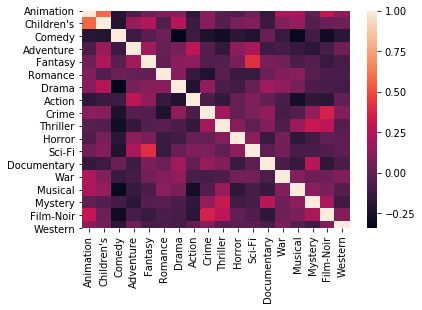

In [80]:
sns.heatmap(correlacion_generos)